In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix,classification_report

!pip install tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached h5p

  You can safely remove it manually.
  You can safely remove it manually.


In [90]:
df=pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Exploratory Data Analysis

In [36]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

<Axes: xlabel='Exited', ylabel='CreditScore'>

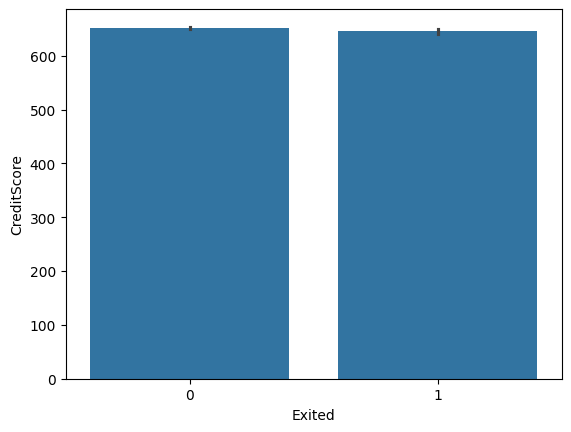

In [43]:
sns.barplot(x='Exited',y='CreditScore',data=df)

In [42]:
df.groupby(['Geography','Exited'])['CreditScore'].mean()

Geography  Exited
France     0         651.162226
           1         641.914815
Germany    0         653.261357
           1         647.689189
Spain      0         652.104167
           1         647.484262
Name: CreditScore, dtype: float64

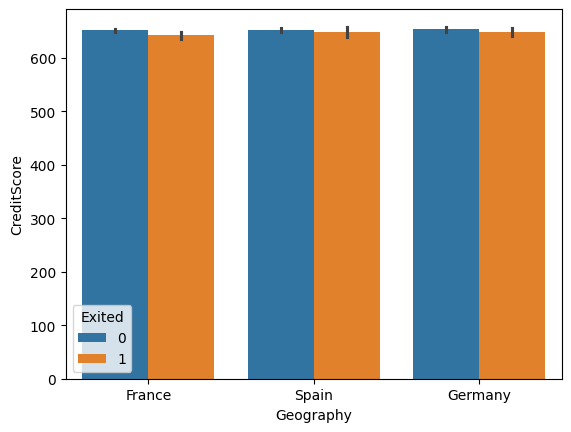

In [41]:

sns.barplot(x='Geography',y='CreditScore',hue='Exited',data=df)
plt.show()

Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
dtype: int64

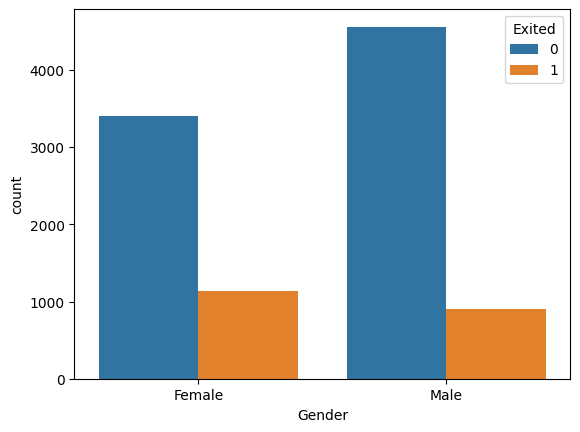

In [55]:
sns.countplot(x='Gender',hue='Exited',data=df)
df.groupby(['Exited','Gender']).size()


Exited  HasCrCard
0       0            2332
        1            5631
1       0             613
        1            1424
dtype: int64

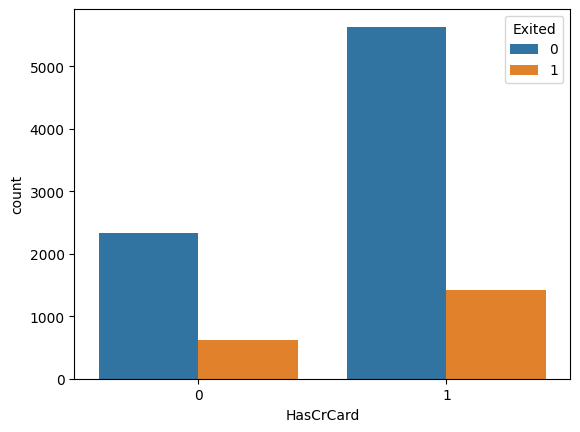

In [56]:
sns.countplot(x='HasCrCard',hue='Exited',data=df)
df.groupby(['Exited','HasCrCard']).size()

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
dtype: int64

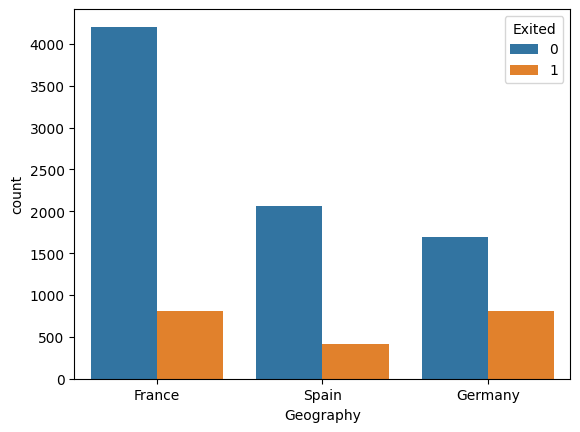

In [57]:

sns.countplot(x='Geography',hue='Exited',data=df)
df.groupby(['Exited','Geography']).size()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
dtype: int64

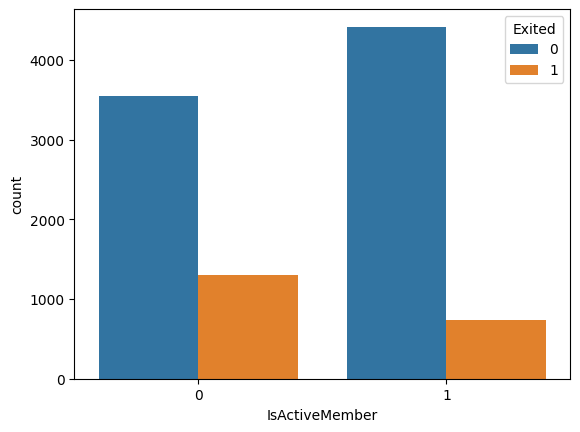

In [60]:
sns.countplot(x='IsActiveMember',data=df,hue='Exited')
df.groupby(['IsActiveMember','Exited']).size()

<Axes: xlabel='Age', ylabel='Count'>

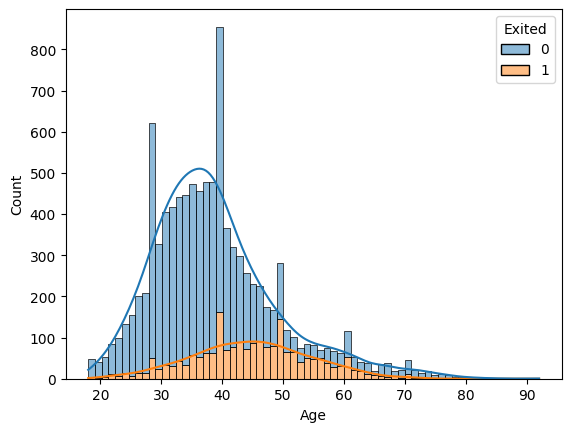

In [69]:
sns.histplot(x='Age',hue='Exited',data=df,kde=True,multiple='stack')

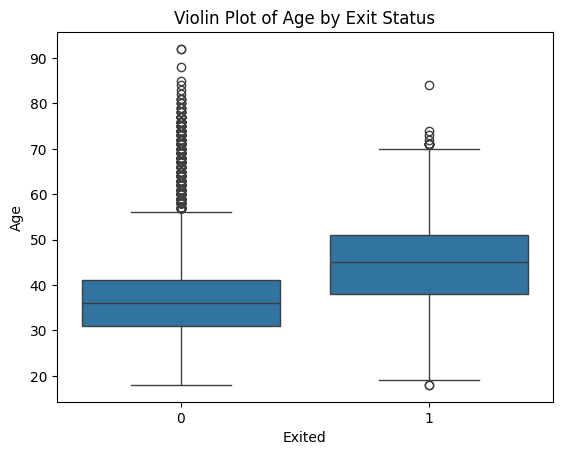

In [73]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Violin Plot of Age by Exit Status')
plt.show()


Data Preprocessing 

In [76]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(0)

In [91]:
#removing unnecessary columns
df.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [93]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [94]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


Defining features and target variable

In [95]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [98]:
#splitting data to train and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
print("no of rows in train dataset",y_train.shape[0])
print("no of rows in test dataset",y_test.shape[0])

no of rows in train dataset 8000
no of rows in test dataset 2000


Model Building

In [ ]:
#function to evaluate metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
def metrics_evaluation(model,predictors,target):
    #predicting values of  data
    y_pred=model.predict(predictors)
    y_pred = (y_pred > 0.5)
    
    #metrics evaluation
    f1=f1_score(target,y_pred)
    recall=recall_score(target,y_pred)
    precision=precision_score(target,y_pred)
    accuracy=accuracy_score(target,y_pred)
    
    perf=pd.DataFrame({
        'Accuracy':accuracy,
        'Precision':precision,
        'Recall': recall,
        'f1_score':f1},index=[0])
    return perf

In [ ]:
from sklearn.metrics import confusion_matrix
#function for confusion matrix
def confusion_mat(model,predictors,target):
    #predicting values of data
    y_pred=model.predict(predictors)
    y_pred = (y_pred > 0.5)


    #confusion matrix
    cm=confusion_matrix(target,y_pred)

    labels=np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=labels,fmt="")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.show()
    

In [111]:
#scaling the Features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [113]:
X_train[0]

array([ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
        0.80843615,  0.64920267,  0.97481699,  1.36766974])

In [119]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=9))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7917 - loss: 0.5510 - val_accuracy: 0.7994 - val_loss: 0.4449
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8014 - loss: 0.4473 - val_accuracy: 0.8144 - val_loss: 0.4226
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8076 - loss: 0.4284 - val_accuracy: 0.8238 - val_loss: 0.4114
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4247 - val_accuracy: 0.8244 - val_loss: 0.4050
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8138 - loss: 0.4152 - val_accuracy: 0.8244 - val_loss: 0.3984
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8160 - loss: 0.4070 - val_accuracy: 0.8338 - val_loss: 0.3906
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8308 - loss: 0.3833 - val_accuracy: 0.8438 - val_loss: 0.3816
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8401 - loss: 0.3786 - val_accuracy: 0.

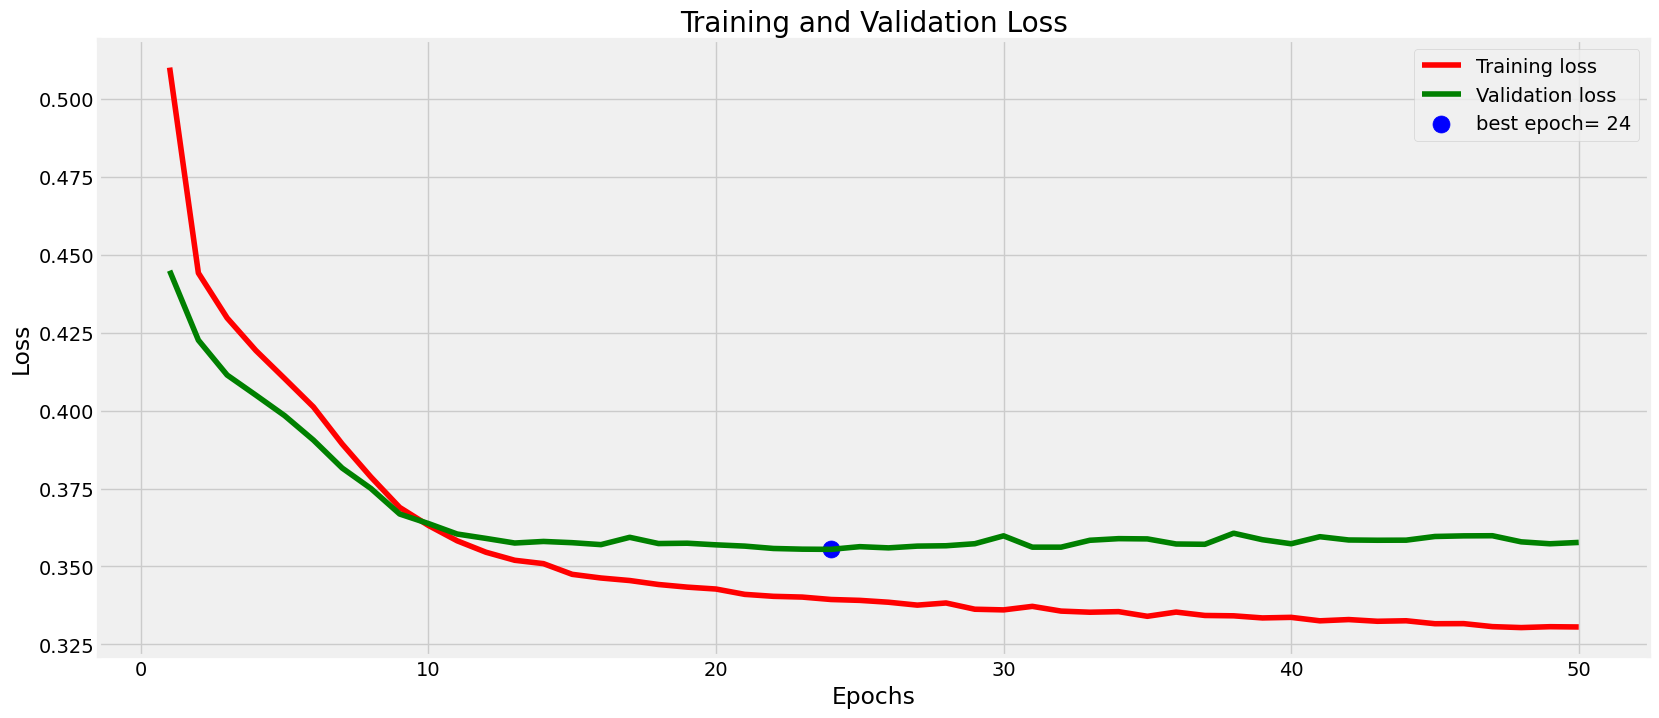

In [120]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

[NbConvertApp] Converting notebook churn_ANN.ipynb to HTML
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 611399 bytes to churn_ANN.html


In [128]:
metrics_evaluation(model,X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Precision,Recall,f1_score
0,0.857,0.704981,0.468193,0.562691


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


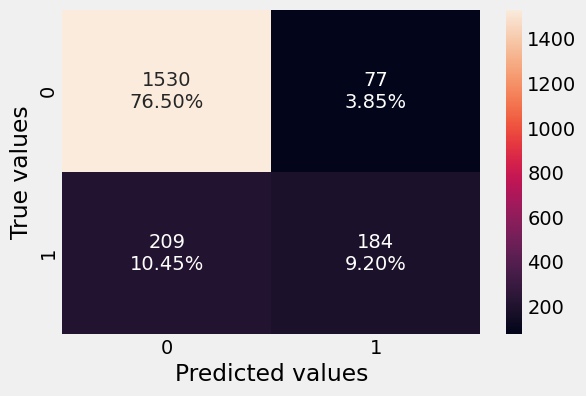

In [132]:
confusion_mat(model,X_test,y_test)

In [133]:
import nbconvert
!jupyter nbconvert churn_ANN.ipynb --to HTML


[NbConvertApp] Converting notebook churn_ANN.ipynb to HTML
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 659492 bytes to churn_ANN.html
